In [1]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import bs4

In [490]:
myUrl = 'http://nytimes.com'

In [491]:
html = uReq(myUrl)
page_soup = soup(html.read(), 'html.parser');
print(page_soup.title)

<title data-rh="true">The New York Times - Breaking News, US News, World News and Videos</title>


In [22]:
##writing News Feed to a CSV
import csv
csvFile = open("./NewsFeeds.csv", 'w+', newline='')
try:
    writer = csv.writer(csvFile)
    writer.writerow(('Headlines','DetailedNews','Category'))
except:
    print("Problem occured while opening the document!!!!!")

In [79]:
count = 0
_todays_highlights_heading =  page_soup.find('section', attrs={'data-testid':'block-TopStories'}).findAll("h2",{"class":"css-1vvhd4r"})
for _each_highlights in _todays_highlights_heading:
    _todays_highlights = _each_highlights.find('span')
    count+=1
    print(count,":",_todays_highlights.get_text())

1 : Reports of Private White House Virus Briefings Fueled Early Stock Sell-Off
2 : Barrett, Vowing Independence, Is Haunted by Trump’s Demands
3 : Harris’s New Strategy: A Hearing Appearance That Doesn’t Make Waves
4 : Biden Raised $383 Million Last Month; Enters October With $432 Million
5 : Nick Saban, Alabama’s Football Coach, Tests Positive for Coronavirus
6 : White Woman Made 2nd 911 Call to Falsely Accuse Black Bird-Watcher


In [500]:
count = 0
_todays_highlights_heading =  page_soup.find('section', attrs={'data-testid':'block-TopStories'}).findAll("h2",{"class":"css-1vvhd4r"})
for _each_highlights in _todays_highlights_heading:
    _todays_highlights = _each_highlights.find('span')
    count+=1
    print(count,":",_todays_highlights.get_text())

1 : Trump’s Combative Town Hall Stands in Stark Contrast With Biden Event
2 : On Two Networks, a Pair of Telecasts as Different as the Candidates
3 : Headed Toward 3rd Peak, U.S. Surpasses 8 Million Known Cases
4 : Republicans Clash on Stimulus as Trump Says ‘Go Big’ and McConnell Demurs
5 : Trump Was Warned Giuliani Was Conveying Russian Disinformation, Officials Say
6 : By Calling Climate Change ‘Controversial,’ Barrett Created Controversy


In [501]:
_todays_reports =  page_soup.find('section', attrs={'data-testid':'block-TopStories'}).findAll("a")
count1 = 0
_news_list = []
for _news_details in _todays_reports:
    news = _news_details.find('p')
    headings = _news_details.find('span')
    if ((news != None) and (headings != None)):
        count1+=1
        print("Hot News Headline!",count1,":",headings.get_text())
        print("Detialed News:",news.get_text())
        _heading = headings.get_text()
        _text = news.get_text()
        writer.writerow((_heading,_text,'Breaking News'))
        
        
        


Hot News Headline! 1 : On Two Networks, a Pair of Telecasts as Different as the Candidates
Detialed News: On NBC, Savannah Guthrie pressed President Trump for answers, while Joe Biden and George Stephanopoulos engaged in a sober policy conversation on ABC.
Hot News Headline! 2 : Republicans Clash on Stimulus as Trump Says ‘Go Big’ and McConnell Demurs
Detialed News: President Trump called for a plan of the kind envisioned by Democrats. Senator Mitch McConnell said Republicans could not accept so large a deal.
Hot News Headline! 3 : Trump Was Warned Giuliani Was Conveying Russian Disinformation, Officials Say
Detialed News: President Trump shrugged off the warning from the intelligence agencies about Rudy Giuliani, his personal lawyer, officials said.
Hot News Headline! 4 : By Calling Climate Change ‘Controversial,’ Barrett Created Controversy
Detialed News: Judge Amy Coney Barrett refused to answer numerous questions, but it was her avoidance of acknowledging climate change that partic

In [502]:
_short_stories =  page_soup.find('section', attrs={'data-testid':'block-TopStories'}).findAll("article")

for _each_short_stories in _short_stories:
    _short_heading = _each_short_stories.find('h2',attrs={'class':'css-1cmu9py e1voiwgp0'})
    _msg = _each_short_stories.find('p')
    if((_short_heading !=None and _msg !=None)):
        print("Short heading::",_short_heading.get_text())
        print("story:",_msg.get_text())

Short heading:: Slamming Trump, G.O.P. Senator Warns of a ‘Republican Blood Bath’
story: Senator Ben Sasse of Nebraska said President Trump cozied up to dictators and white supremacists during a telephone town hall with constituents.
Short heading:: Christie Says He Was ‘Wrong’ Not to Wear Masks at White House
story: Chris Christie, the former New Jersey governor who was hospitalized as he battled Covid-19, urged people to follow C.D.C. guidelines in public.
Short heading:: As Virus Surges and Brexit Bears Down, Boris Johnson Stalls
story: The prime minister’s delaying strategy carries risks if he misplays his hand, with the pandemic worsening and a Brexit deadline approaching.
Short heading:: Facebook and Twitter Dodge a 2016 Repeat, and Ignite a 2020 Firestorm
story: Tech companies have vowed to do more to fight misinformation and foreign interference. This is what “doing more” looks like, our columnist writes.
Short heading:: In Hubbub Over New York Post Report, YouTube Is Silent
st

In [130]:
_short_stories =  page_soup.find('section', attrs={'data-testid':'block-TopStories'}).findAll("article")

for _each_short_stories in _short_stories:
    _short_heading = _each_short_stories.find('h2',attrs={'class':'css-1cmu9py e1voiwgp0'})
    _msg = _each_short_stories.find('p')
    if((_short_heading !=None and _msg !=None)):
        print("Short heading::",_short_heading.get_text())
        print("story:",_msg.get_text())

Short heading:: Europe, Which Thought It Had the Virus Tamed, Faces a Resurgence
story: France imposed a curfew on Paris and other major cities, and other countries are taking similar steps as record caseloads fill hospitals.
Short heading:: As Virus Hits Rural America, Smaller Numbers Mask the Toll
story: See all new cases around the world
Short heading:: Why ‘Supermom’ Gets Star Billing on Résumés for Public Office
story: Judge Amy Coney Barrett and Senator Kamala Harris negotiate America’s loaded expectations for women.
Short heading:: ‘Severability’ Could Save A.C.A., Graham Says and Barrett Seems to Agree
story: Democrats’ warnings that the nominee threatened the health care law elicited reassuring words from Senator Lindsey Graham and Judge Amy Coney Barrett.
Short heading:: The Day in Polls: Strong Results for Biden in the Sun Belt
story: It was another bad day for the president. Here’s our analysis of recent polling, posted daily now through Election Day.
Short heading:: 4 Elec

In [138]:
_opinion =  page_soup.find('section', attrs={'data-testid':'block-Opinion'}).findAll("article")
_opinion

for _text in _opinion:
    nameClass = _text.find('div',attrs={'class':'css-tnu8m6 e18df3gd0'})
    if nameClass !=None:
        print(nameClass.get_text())

Charles M. Blow
Thomas B. Edsall
Gail Collins
Frank Bruni
Geraldo L. Cadava
Kara Swisher
Farhad Manjoo
Jennifer Finney Boylan
Tala Schlossberg and Andrew Blackwell
Veronique de Rugy


In [158]:
_todays_reports1 =  page_soup.find('section', attrs={'data-testid':'block-TopStories'}).findAll("p")
_todays_reports2 =  page_soup.find('section', attrs={'data-testid':'block-TopStories'}).findAll("article")
_new_list = []
for n1 in _todays_reports1:
     _new_list.append(n1.get_text().strip())
for n2 in _todays_reports2:
    news = n2.findAll('p')
    for news1 in news:
        _new_list.append(news1.get_text())
_new_list

['France imposed a curfew on Paris and other major cities, and other countries are taking similar steps as record caseloads fill hospitals.',
 'See all new cases around the world',
 'See the U.S. hot spots',
 'Surges in rural areas have been just as severe as the spikes in densely populated cities in the Sun Belt over the summer. Here’s the latest.',
 'Judge Amy Coney Barrett is not the first Supreme Court nominee to profess her independence, but her task has been made far more complicated by the president.',
 'Judge Amy Coney Barrett and Senator Kamala Harris negotiate America’s loaded expectations for women.',
 'Democrats’ warnings that the nominee threatened the health care law elicited reassuring words from Senator Lindsey Graham and Judge Amy Coney Barrett.',
 'Senator Kamala Harris is known for her withering prosecutorial style, but she cut a more restrained profile while questioning Judge Amy Coney Barrett.',
 'It was another bad day for the president. Here’s our analysis of rec

In [245]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.book import *

_main_list = []
for sentence in _new_list:
    _token_list = word_tokenize(sentence)
    for _x1 in _token_list:
        _main_list.append(_x1)

# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc = []
for _each_word in _main_list:
    if(re.sub('[\W\_]','',_each_word)):
        _tokenized_word_punc.append(_each_word)


##Stop-words:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = nltk.corpus.words.words()
content = [_nonstop_word for _nonstop_word in _tokenized_word_punc if _nonstop_word.lower() in wordlist if _nonstop_word.lower() not in stopwords]


## Most Common Words::
_dict = {}
count = 0
_counter1 = Counter()
for content_word in content:
    _counter1[content_word]+=1
#print(_counter1)
_most_common_word= _counter1.most_common(10)
#print(_most_common_word)

## PO-tagging and Freq Dist:
_pos_tagged_words = nltk.pos_tag(content)
print(_pos_tagged_words)
fdist = nltk.FreqDist(tag for (word, tag) in _pos_tagged_words)
print(fdist.most_common())

## Collacations:
_collac_text = nltk.Text(content)
_collac_text.collocations(num=30,window_size=2)

[('curfew', 'NN'), ('major', 'JJ'), ('taking', 'VBG'), ('similar', 'JJ'), ('record', 'NN'), ('fill', 'NN'), ('See', 'NNP'), ('new', 'JJ'), ('around', 'IN'), ('world', 'NN'), ('See', 'NNP'), ('hot', 'JJ'), ('rural', 'JJ'), ('severe', 'JJ'), ('densely', 'RB'), ('Sun', 'NNP'), ('Belt', 'NNP'), ('summer', 'NN'), ('latest', 'JJS'), ('Judge', 'NNP'), ('Amy', 'NNP'), ('first', 'RB'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('nominee', 'VBD'), ('profess', 'JJ'), ('independence', 'NN'), ('task', 'NN'), ('made', 'VBD'), ('far', 'RB'), ('complicated', 'VBN'), ('president', 'NN'), ('Judge', 'NNP'), ('Amy', 'NNP'), ('Senator', 'NNP'), ('Kamala', 'NNP'), ('negotiate', 'NN'), ('loaded', 'VBD'), ('nominee', 'JJ'), ('health', 'NN'), ('care', 'NN'), ('law', 'NN'), ('reassuring', 'VBG'), ('Senator', 'NNP'), ('Graham', 'NNP'), ('Judge', 'NNP'), ('Amy', 'NNP'), ('Senator', 'NNP'), ('Kamala', 'NNP'), ('known', 'VBN'), ('withering', 'VBG'), ('style', 'NN'), ('cut', 'NN'), ('restrained', 'VBD'), ('profile', 'IN

In [180]:
_links =  page_soup.find('ul', attrs={'data-testid':'mini-nav'}).findAll("li",{"data-testid":"mini-nav-item"})
_total_links = []
for link in _links:
    for a in link:
        _total_links.append(a['href'])
        print(a['href'])

https://www.nytimes.com/section/world
https://www.nytimes.com/section/us
https://www.nytimes.com/section/politics
https://www.nytimes.com/section/nyregion
https://www.nytimes.com/section/business
https://www.nytimes.com/section/opinion
https://www.nytimes.com/section/technology
https://www.nytimes.com/section/science
https://www.nytimes.com/section/health
https://www.nytimes.com/section/sports
https://www.nytimes.com/section/arts
https://www.nytimes.com/section/books
https://www.nytimes.com/section/style
https://www.nytimes.com/section/food
https://www.nytimes.com/section/travel
https://www.nytimes.com/section/magazine
https://www.nytimes.com/section/t-magazine
https://www.nytimes.com/section/realestate
https://www.nytimes.com/video


In [182]:
_total_links[0]

'https://www.nytimes.com/section/world'

In [185]:
html = uReq(_total_links[0])
page_soup1 = soup(html.read(), 'html.parser');
print(page_soup1.title)

<title data-rh="true">World News - The New York Times</title>


In [237]:
_highlights =  page_soup1.find('section', attrs={'id':'collection-world'}).findAll("article")
_highlights
count = 0
_news_list2 = []
for _news2 in _highlights:
    _newss2 = (_news2.find('h2').findAll('a'))
    count+=1
    for _headings2 in _newss2:
        _news_list2.append(_headings2.get_text())
        print("Top Highlights",count,"::",_headings2.get_text())

Top Highlights 1 :: ‘This Is a War’: Cross-Border Fight Over Water Erupts in Mexico
Top Highlights 2 :: As Motorcade Rolls By, Thai Royal Family Glimpses the People’s Discontent
Top Highlights 3 :: In City Where China Welcomed the World, Xi Prepares for a Colder One
Top Highlights 4 :: Europe, Which Thought It Had the Virus Tamed, Faces a Resurgence
Top Highlights 5 :: Court Sentences Leaders of Greece’s Golden Dawn to Prison
Top Highlights 6 :: Israel and Lebanon Begin Talks on Sea Border, With U.S. as Mediator
Top Highlights 7 :: E.U. Preparing Sanctions on Putin Allies Over Navalny’s Poisoning
Top Highlights 8 :: Indonesian Defense Chief, Accused of Rights Abuses, Will Visit Pentagon
Top Highlights 9 :: He Built a Trump Statue and Worshiped It. Then He Collapsed.
Top Highlights 10 :: Central Europe, Spared in the Spring, Suffers as Virus Surges
Top Highlights 11 :: Trump Thought He Had a Nuclear Deal With Putin. Not So Fast, Russia Said.
Top Highlights 12 :: For Indian Women Working

In [503]:
_highlights =  page_soup1.find('section', attrs={'id':'collection-world'}).findAll("article")
_highlights
count = 0

for _news2 in _highlights:
    x1 =_news2.find('p', attrs={'class':'css-tskdi9'})
    x2 = _news2.find('h2').findAll('a')
    for heading in x2:
        if x1 != None and heading != None :
            count+=1
            _news_list2.append(x1.get_text())
            print("Highlights:",count,"::",heading.get_text())
            print("Story:",x1.get_text())
            writer.writerow((heading.get_text(),x1.get_text(),'World News'))

Highlights: 1 :: ‘This Is a War’: Cross-Border Fight Over Water Erupts in Mexico
Story: Farmers in Mexico ambushed soldiers and seized a dam to stop water payments to the United States, in a sign of growing conflict over increasingly scarce resources.
Highlights: 2 :: As Motorcade Rolls By, Thai Royal Family Glimpses the People’s Discontent
Story: As antigovernment protesters took to the streets, officials imposed an emergency decree in Bangkok, and gatherings of five or more people were banned.
Highlights: 3 :: In City Where China Welcomed the World, Xi Prepares for a Colder One
Story: China’s leader, Xi Jinping, speaking in the early trading center of Shenzhen, emphasized domestic innovation amid tensions with the United States.
Highlights: 4 :: Europe, Which Thought It Had the Virus Tamed, Faces a Resurgence
Story: France imposed a curfew on Paris and other major cities, and other countries are taking similar steps as record caseloads fill hospitals and governments try to respond wi

In [504]:
_latest =  page_soup1.find('section', attrs={'id':'stream-panel'}).findAll("li")
_latest


for news in _latest:
    print("Latest News::",news.find("a").find("h2").get_text())
    _news_story = news.find("a").find("p").get_text()
    print("story link::",_news_story)
    _news_list2.append(_news_story)
    
    

Latest News:: This Urban Safari Comes With a Warning: Watch Out for Snakes
story link:: On nighttime hikes in Hong Kong’s surprisingly lush forests, a snake catcher teaches city slickers about the reptiles — and their bites.
Latest News:: Your Thursday Briefing
story link:: Coronavirus, Supreme Court, Pret A Manger: Here’s what you need to know.
Latest News:: The Jailed Activist Left a Letter Behind. The Message: Keep Fighting.
story link:: Pham Doan Trang was harassed for years by the Vietnamese police, even beaten. In a letter, she foretold her arrest and called for an end to one-party rule.
Latest News:: World War II-Era ‘Earthquake Bomb’ Explodes in Polish Waters
story link:: Polish Navy divers tried to remotely neutralize a six-ton “Tallboy” dropped by the British, but the bomb had no intention of going quietly.
Latest News:: Coronavirus Briefing: What Happened Today
story link:: Startling fall surges in the United States and Europe could set the stage for wintertime peaks.
Latest

In [505]:
 _news_list2

['‘This Is a War’: Cross-Border Fight Over Water Erupts in Mexico',
 'As Motorcade Rolls By, Thai Royal Family Glimpses the People’s Discontent',
 'In City Where China Welcomed the World, Xi Prepares for a Colder One',
 'Europe, Which Thought It Had the Virus Tamed, Faces a Resurgence',
 'Court Sentences Leaders of Greece’s Golden Dawn to Prison',
 'Israel and Lebanon Begin Talks on Sea Border, With U.S. as Mediator',
 'E.U. Preparing Sanctions on Putin Allies Over Navalny’s Poisoning',
 'Indonesian Defense Chief, Accused of Rights Abuses, Will Visit Pentagon',
 'He Built a Trump Statue and Worshiped It. Then He Collapsed.',
 'Central Europe, Spared in the Spring, Suffers as Virus Surges',
 'Trump Thought He Had a Nuclear Deal With Putin. Not So Fast, Russia Said.',
 'For Indian Women Working as Cooks and Nannies, No #MeToo Moment',
 'BTS’s Loyal Army of Fans Is the Secret Weapon Behind a $4 Billion I.P.O.',
 'Vatican Puts Priests on Trial Over Alleged Abuse Within Its Walls',
 'Did Lo

In [248]:
_main_list2 = []
for sentence2 in _news_list2:
    _token_list2 = word_tokenize(sentence2)
    for _token2 in _token_list2:
        _main_list2.append(_token2)

# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc2 = []
for _each_word2 in _main_list2:
    if(re.sub('[\W\_]','',_each_word2)):
        _tokenized_word_punc2.append(_each_word2)


##Stop-words:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = nltk.corpus.words.words()
content2 = [_nonstop_word2 for _nonstop_word2 in _tokenized_word_punc2 if _nonstop_word2.lower() in wordlist if _nonstop_word2.lower() not in stopwords]
print(content2)

## Most Common Words::
_dict = {}
count = 0
_counter2 = Counter()
for content_word in content2:
    _counter2[content_word]+=1
print(_counter2)
_most_common_word2= _counter2.most_common(10)
print(_most_common_word2)

## PO-tagging and Freq Dist:
_pos_tagged_words2 = nltk.pos_tag(content)
print(_pos_tagged_words2)
fdist2 = nltk.FreqDist(tag for (word, tag) in _pos_tagged_words2)
print(fdist2.most_common())

## Collacations:
_collac_text2 = nltk.Text(content2)
_collac_text2.collocations(num=100,window_size=3)

['War', 'Fight', 'Water', 'Motorcade', 'Royal', 'Family', 'People', 'Discontent', 'City', 'China', 'World', 'Xi', 'Colder', 'One', 'Thought', 'Virus', 'Resurgence', 'Court', 'Golden', 'Dawn', 'Prison', 'Begin', 'Sea', 'Border', 'Mediator', 'Allies', 'Poisoning', 'Defense', 'Chief', 'Accused', 'Visit', 'Pentagon', 'Built', 'Trump', 'Statue', 'Central', 'Spring', 'Virus', 'Trump', 'Thought', 'Nuclear', 'Deal', 'Fast', 'Russia', 'Said', 'Working', 'Moment', 'Loyal', 'Army', 'Secret', 'Weapon', 'Behind', 'Billion', 'Trial', 'Abuse', 'Within', 'Lower', 'Premature', 'New', 'Study', 'Evidence', 'sabe', 'para', 'te', 'Live', 'Quarantine', 'U', 'Local', 'Bookstore', 'Know', 'Struggling', 'Million', 'Slipped', 'Poverty', 'Since', 'May', 'Federal', 'Aid', 'Dried', 'Es', 'la', 'el', 'agua', 'en', 'la', 'de', 'de', 'en', 'dosis', 'de', 'al', 'de', 'la', 'pandemia', 'la', 'de', 'de', 'en', 'la', 'mental', 'de', 'la', 'Call', 'Dreamer', 'Neighborhood', 'Keep', 'Calm', 'Carry', 'May', 'Work', 'Time', 

In [249]:
_total_links[1]

'https://www.nytimes.com/section/us'

In [263]:
html = uReq(_total_links[1])
page_soup3 = soup(html.read(), 'html.parser');
_news_list3 = []
_ushighlights =  page_soup3.find('section', attrs={'id':'collection-highlights-container'}).findAll("article")
_ushighlights

for _usnews in _ushighlights:
    print("Headlines:",_usnews.find('h2').find('a').get_text())
    print("Story::",_usnews.find('p').get_text())
    _news_list3.append(_usnews.find('p').get_text())

_uslatestnews =  page_soup3.find('section', attrs={'id':'stream-panel'}).findAll("li")

print("For the Latest Updates from US#####")
for _uslnews in _uslatestnews:
    print("Latest News::",_uslnews.find("a").find("h2").get_text())
    _news_story = _uslnews.find("a").find("p").get_text()
    _news_list3.append(_news_story)
    print("story link::",_news_story)

Headlines: Reporting Live From Quarantine U.
Story:: Faced with soaring coronavirus caseloads, some universities told students to “stay put” for 14 days. College journalists report from their quarantined campuses.
Headlines: Children From Immigrant Families Are Increasingly the Face of Higher Education
Story:: U.S.-born children of immigrants or immigrant students raised in the United States accounted for nearly 60 percent of the growth in university enrollment since 2000.
Headlines: The Census, the Supreme Court and Why the Count Is Stopping Early
Story:: The Supreme Court has allowed the Trump administration to stop the 2020 count. Here’s what that means for the census.
Headlines: From School Boards to the Senate, All Politics Is Virus Politics in 2020
Story:: The pandemic has inspired new candidates to run, and defined the debate in campaigns up and down the ballots.
For the Latest Updates from US#####
Latest News:: What Proposition 14 Tells Us About California
story link:: Thursday

In [264]:
_news_list3

['Faced with soaring coronavirus caseloads, some universities told students to “stay put” for 14 days. College journalists report from their quarantined campuses.',
 'U.S.-born children of immigrants or immigrant students raised in the United States accounted for nearly 60 percent of the growth in university enrollment since 2000.',
 'The Supreme Court has allowed the Trump administration to stop the 2020 count. Here’s what that means for the census.',
 'The pandemic has inspired new candidates to run, and defined the debate in campaigns up and down the ballots.',
 'Thursday: A lesser known ballot proposition illustrates the state’s famed system at work. Also: Dangerous weather; and powerful images of midwives.',
 'On Thursday, the Senate Judiciary Committee debates approving the nomination of Judge Amy Coney Barrett to the Supreme Court.',
 'Seatbelt laws were a hard sell in state capitals as opponents argued they were uncomfortable or an imposition on personal liberty. Sound familiar

In [267]:
_main_list3 = []
for sentence3 in _news_list3:
    _token_list3 = word_tokenize(sentence3)
    for _token3 in _token_list3:
        _main_list3.append(_token3)

# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc3 = []
for _each_word3 in _main_list3:
    if(re.sub('[\W\_]','',_each_word3)):
        _tokenized_word_punc3.append(_each_word3)


##Stop-words:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = nltk.corpus.words.words()
content3 = [_nonstop_word3 for _nonstop_word3 in _tokenized_word_punc3 if _nonstop_word3.lower() in wordlist if _nonstop_word3.lower() not in stopwords]
print(content3)

## Most Common Words::
_dict = {}
count = 0
_counter3 = Counter()
for content_word in content3:
    _counter3[content_word]+=1
print(_counter3)
_most_common_word3= _counter3.most_common(10)
print(_most_common_word3)

## PO-tagging and Freq Dist:
_pos_tagged_words3 = nltk.pos_tag(content)
print(_pos_tagged_words3)
fdist3 = nltk.FreqDist(tag for (word, tag) in _pos_tagged_words3)
print(fdist3.most_common())

## Collacations:
_collac_text3 = nltk.Text(content3)
_collac_text3.collocations(num=100,window_size=3)

['Faced', 'soaring', 'told', 'stay', 'put', 'days', 'College', 'report', 'immigrant', 'raised', 'United', 'nearly', 'percent', 'growth', 'university', 'enrollment', 'since', 'Supreme', 'Court', 'Trump', 'administration', 'stop', 'count', 'census', 'pandemic', 'inspired', 'new', 'run', 'defined', 'debate', 'lesser', 'known', 'ballot', 'proposition', 'state', 'system', 'work', 'Also', 'Dangerous', 'weather', 'powerful', 'Senate', 'Judiciary', 'Committee', 'nomination', 'Judge', 'Amy', 'Supreme', 'Court', 'hard', 'sell', 'state', 'uncomfortable', 'imposition', 'personal', 'liberty', 'Sound', 'familiar', 'move', 'comes', 'two', 'Supreme', 'Court', 'sentence', 'death', 'Conservative', 'looming', 'threat', 'morning', 'tip', 'sheet', 'President', 'Trump', 'Joe', 'appear', 'simultaneous', 'night', 'starting', 'Eastern', 'time', 'else', 'need', 'know', 'today', 'Millions', 'person', 'mail', 'go', 'Election', 'Day', 'beauty', 'supply', 'shop', 'one', 'dream', 'come', 'true', 'Another', 'still', 

In [282]:
html = uReq(_total_links[2])
page_soup4 = soup(html.read(), 'html.parser');
_news_list4 = []
_politics =  page_soup4.find('section', attrs={'id':'collection-highlights-container'}).findAll("article")

print("All Headlines on News:::###")
for _politicsnews in _politics:
    print("Headlines:",_politicsnews.find('h2').find('a').get_text())
    print("Story::",_politicsnews.find('p').get_text())
    _news_list4.append(_politicsnews.find('p').get_text())

_politicslatestnews =  page_soup4.find('section', attrs={'id':'stream-panel'}).findAll("li")

print("For the Latest Updates from Political Page#####")
for _polticallnews in _politicslatestnews:
    _pheadings = _polticallnews.find("a").find("h2")
    _news_story = _polticallnews.find("a").find("p")
    if (_pheadings != None and _news_story !=None):
        _pheading = _pheadings.get_text()
        _news_storys =  _news_story.get_text()
        print("Live Updates Headlines:",_pheading)
        print("updates::",_news_storys)
    _news_list4.append(_news_storys)

All Headlines on News:::###
Headlines: As Virus Spread, Reports of Trump Administration’s Private Briefings Fueled Sell-Off
Story:: A hedge fund consultant’s summary of private presentations by White House economic advisers fanned investor worries.
Headlines: As Trump’s Language Grows More Heated, Fears Rise of Political Violence
Story:: The plot to kidnap the governor of Michigan is only the latest in a growing list of election-related threats. Some experts say the president is emboldening extremists.
Headlines: 8 Million Have Slipped Into Poverty Since May as Federal Aid Has Dried Up
Story:: Two new studies show the effect of the emergency $2 trillion package known as the Cares Act and what happened when the money ran out.
Headlines: The 2020 Election Is Happening Right Now
Story:: Millions have voted in person or by mail, with weeks to go before Election Day.
For the Latest Updates from Political Page#####
Live Updates Headlines: Trump’s Tweets on Troop Withdrawals Unnerve Pentagon


In [283]:
_main_list4 = []
for sentence4 in _news_list4:
    _token_list4 = word_tokenize(sentence4)
    for _token4 in _token_list4:
        _main_list4.append(_token4)

# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc4 = []
for _each_word4 in _main_list4:
    if(re.sub('[\W\_]','',_each_word4)):
        _tokenized_word_punc4.append(_each_word4)


##Stop-words:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = nltk.corpus.words.words()
content4 = [_nonstop_word4 for _nonstop_word4 in _tokenized_word_punc4 if _nonstop_word4.lower() in wordlist if _nonstop_word4.lower() not in stopwords]
print(content4)

## Most Common Words::
_dict = {}
count = 0
_counter4 = Counter()
for content_word in content4:
    _counter4[content_word]+=1
print(_counter4)
_most_common_word4= _counter4.most_common(10)
print(_most_common_word4)

## PO-tagging and Freq Dist:
_pos_tagged_words4 = nltk.pos_tag(content)
print(_pos_tagged_words4)
fdist4 = nltk.FreqDist(tag for (word, tag) in _pos_tagged_words4)
print(fdist4.most_common())

## Collacations:
_collac_text4 = nltk.Text(content4)
_collac_text4.collocations(num=100,window_size=4)

['hedge', 'fund', 'consultant', 'summary', 'private', 'White', 'House', 'economic', 'investor', 'plot', 'kidnap', 'governor', 'Michigan', 'latest', 'growing', 'list', 'say', 'president', 'Two', 'new', 'show', 'effect', 'emergency', 'trillion', 'package', 'known', 'Act', 'money', 'ran', 'Millions', 'person', 'mail', 'go', 'Election', 'Day', 'president', 'draw', 'seek', 'fulfill', 'campaign', 'promise', 'warn', 'rapid', 'troop', 'could', 'bolster', 'Senate', 'Judiciary', 'Committee', 'nomination', 'Judge', 'Amy', 'Supreme', 'Court', 'Conservative', 'looming', 'threat', 'morning', 'tip', 'sheet', 'President', 'Trump', 'Joe', 'appear', 'simultaneous', 'night', 'starting', 'Eastern', 'time', 'Millions', 'person', 'mail', 'go', 'Election', 'Day', 'Judicial', 'Crisis', 'Network', 'Roger', 'senior', 'health', 'human', 'official', 'worked', 'reshape', 'social', 'policy', 'need', 'uphold', 'plot', 'kidnap', 'governor', 'Michigan', 'latest', 'growing', 'list', 'say', 'president', 'Post', 'far', '

In [285]:
html = uReq(_total_links[3])
page_soup5 = soup(html.read(), 'html.parser');
_news_list5 = []
_ny =  page_soup5.find('section', attrs={'id':'collection-highlights-container'}).findAll("article")

print("All Headlines on News:::###")
for __nynews in _ny:
    print("Headlines:",__nynews.find('h2').find('a').get_text())
    print("Story::",__nynews.find('p').get_text())
    _news_list5.append(__nynews.find('p').get_text())

_nyslatestnews =  page_soup5.find('section', attrs={'id':'stream-panel'}).findAll("li")

print("For the Latest Updates from Political Page#####")
for _nyslnews in _nyslatestnews:
    _nyheadings = _nyslnews.find("a").find("h2")
    _nys_story = _nyslnews.find("a").find("p")
    if (_nyheadings != None and _nys_story !=None):
        _nyheading = _nyheadings.get_text()
        _nys_storys =  _nys_story.get_text()
        print("Live Updates Headlines:",_pheading)
        print("updates::",_nys_storys)
    _news_list5.append(_nys_storys)

All Headlines on News:::###
Headlines: Ray McGuire, Wall Street Executive, Enters N.Y.C. Mayor’s Race
Story:: Business leaders encouraged Mr. McGuire to seek the Democratic nomination, saying his background would help the city and its economy recover from the pandemic.
Headlines: Inspired by Trump, Hasidic Backlash Grows Over Virus Rules
Story:: Orthodox Jewish leaders have seen a growing, raucous faction of young men in the community, tired of pandemic guidelines and resentful of the secular authorities.
Headlines: 5 Professors Sue Rutgers, Saying It Shortchanges Women on Pay
Story:: The five women say they are paid tens of thousands of dollars less than men with similar qualifications. The university says it is “committed to pay equity.”
Headlines: U.S. Attorney Moves In on Brooklyn D.A.’s Territory, Citing Crime Surge
Story:: Federal prosecutors will take more lower-level gun cases, in an initiative that thrusts the borough into the national debate about law enforcement.
Headlines: 

In [286]:
_main_list5 = []
for sentence5 in _news_list5:
    _token_list5 = word_tokenize(sentence5)
    for _token5 in _token_list5:
        _main_list5.append(_token5)

# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc5 = []
for _each_word5 in _main_list5:
    if(re.sub('[\W\_]','',_each_word5)):
        _tokenized_word_punc5.append(_each_word5)


##Stop-words:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = nltk.corpus.words.words()
content5 = [_nonstop_word5 for _nonstop_word5 in _tokenized_word_punc5 if _nonstop_word5.lower() in wordlist if _nonstop_word5.lower() not in stopwords]
print(content5)

## Most Common Words::
_dict = {}
count = 0
_counter5 = Counter()
for content_word in content5:
    _counter5[content_word]+=1
print(_counter5)
_most_common_word5= _counter5.most_common(10)
print(_most_common_word5)

## PO-tagging and Freq Dist:
_pos_tagged_words5 = nltk.pos_tag(content)
print(_pos_tagged_words5)
fdist5 = nltk.FreqDist(tag for (word, tag) in _pos_tagged_words5)
print(fdist5.most_common())

## Collacations:
_collac_text5 = nltk.Text(content5)
_collac_text5.collocations(num=100,window_size=5)


['Business', 'seek', 'Democratic', 'nomination', 'saying', 'background', 'would', 'help', 'city', 'economy', 'recover', 'pandemic', 'Orthodox', 'seen', 'growing', 'raucous', 'faction', 'young', 'men', 'community', 'tired', 'pandemic', 'resentful', 'secular', 'five', 'say', 'less', 'men', 'similar', 'university', 'pay', 'equity', 'Federal', 'take', 'gun', 'initiative', 'borough', 'national', 'debate', 'law', 'enforcement', 'said', 'Cooper', 'police', 'first', 'claim', 'man', 'Central', 'Park', 'leash', 'dog', 'claim', 'tried', 'assault', 'people', 'birthday', 'event', 'said', 'Long', 'Island', 'venue', 'case', 'white', 'woman', 'police', 'Black', 'conversation', 'Black', 'Matter', 'movement', 'heavily', 'district', 'chosen', 'send', 'back', 'school', 'people', 'always', 'deterrent', 'highly', 'personal', 'queer', 'identity', 'love', 'intimacy', 'increasingly', 'week', 'Inwood', 'week', 'Summit', 'Ferry', 'piled', 'hit', 'hard', 'feel', 'powerless', 'everything', 'season', 'cut', 'short'

In [290]:
_total_links[4]

'https://www.nytimes.com/section/business'

In [305]:
html = uReq(_total_links[4])
page_soup6 = soup(html.read(), 'html.parser');
_news_list6 = []
_business =  page_soup6.find('section', attrs={'id':'collection-highlights-container'}).findAll("article")

print("All Headlines on News:::###")
for _businessnews in _business:
    print("Headlines:",_businessnews.find('h2').find('a').get_text())
    print("Story::",_businessnews.find('p').get_text())
    _news_list6.append(_businessnews.find('p').get_text())

## Top Headlines::
for _businessnews in _business:
    for _highlit in _businessnews:
        x1 = _highlit.find('h2')
        if x1 != None:
            _headlines =  x1.find('a')
            print("Top Headlines::",_headlines.get_text())
    
    

print("For the Latest Updates from Business Page#####")
_businesslatestnews =  page_soup6.find('section', attrs={'id':'stream-panel'}).findAll("li")
for _bslnews in _businesslatestnews:
    _bslheadings = _bslnews.find("a").find("h2")
    _bslstorys = _bslnews.find("a").find("p")
    if (_bslheadings != None and _bslstorys !=None):
        _bslheading = _bslheadings.get_text()
        _bslstory =  _bslstorys.get_text()
        print("Live Updates Headlines:",_bslheading)
        print("updates::",_bslstory)
    _news_list6.append(_bslstory)

All Headlines on News:::###
Headlines: YouTube Cracks Down on QAnon Conspiracy Theory, Citing Offline Violence
Story:: YouTube has played a bigger role in moving QAnon from the fringes to the mainstream than most platforms.
Headlines: Black Products. Black Shoppers. Black Workers. But Who Owns the Store?
Story:: At a Chicago beauty supply shop, one American dream has come true. Another is still waiting for its chance.
Headlines: New State Jobless Claims Surge as Employers Shed Jobs: Live Updates
Story:: 
Headlines: U.S. Investigates Vaxart’s Claims Related to Covid-19 Vaccine
Story:: The biotech firm said it was under scrutiny about claims it made on its involvement in Operation Warp Speed, the federal program to develop Covid-19 cures.
Headlines: How Green Is That Electric Car? And When It Hits 100 M.P.H.?
Story:: The Tesla Model S and the Porsche Taycan give environmentally conscious speedsters an outlet for their desires.
Headlines: How to Deal With a Crisis of Misinformation
Story:

In [306]:
_main_list5 = []
for sentence5 in _news_list5:
    _token_list5 = word_tokenize(sentence5)
    for _token5 in _token_list5:
        _main_list5.append(_token5)

# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc5 = []
for _each_word5 in _main_list5:
    if(re.sub('[\W\_]','',_each_word5)):
        _tokenized_word_punc5.append(_each_word5)


##Stop-words:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = nltk.corpus.words.words()
content5 = [_nonstop_word5 for _nonstop_word5 in _tokenized_word_punc5 if _nonstop_word5.lower() in wordlist if _nonstop_word5.lower() not in stopwords]
print(content5)

## Most Common Words::
_dict = {}
count = 0
_counter5 = Counter()
for content_word in content5:
    _counter5[content_word]+=1
print(_counter5)
_most_common_word5= _counter5.most_common(10)
print(_most_common_word5)

## PO-tagging and Freq Dist:
_pos_tagged_words5 = nltk.pos_tag(content)
print(_pos_tagged_words5)
fdist5 = nltk.FreqDist(tag for (word, tag) in _pos_tagged_words5)
print(fdist5.most_common())

## Collacations:
_collac_text5 = nltk.Text(content5)
_collac_text5.collocations(num=100,window_size=5)


['Business', 'seek', 'Democratic', 'nomination', 'saying', 'background', 'would', 'help', 'city', 'economy', 'recover', 'pandemic', 'Orthodox', 'seen', 'growing', 'raucous', 'faction', 'young', 'men', 'community', 'tired', 'pandemic', 'resentful', 'secular', 'five', 'say', 'less', 'men', 'similar', 'university', 'pay', 'equity', 'Federal', 'take', 'gun', 'initiative', 'borough', 'national', 'debate', 'law', 'enforcement', 'said', 'Cooper', 'police', 'first', 'claim', 'man', 'Central', 'Park', 'leash', 'dog', 'claim', 'tried', 'assault', 'people', 'birthday', 'event', 'said', 'Long', 'Island', 'venue', 'case', 'white', 'woman', 'police', 'Black', 'conversation', 'Black', 'Matter', 'movement', 'heavily', 'district', 'chosen', 'send', 'back', 'school', 'people', 'always', 'deterrent', 'highly', 'personal', 'queer', 'identity', 'love', 'intimacy', 'increasingly', 'week', 'Inwood', 'week', 'Summit', 'Ferry', 'piled', 'hit', 'hard', 'feel', 'powerless', 'everything', 'season', 'cut', 'short'

In [326]:
html = uReq(_total_links[5])
page_soup7 = soup(html.read(), 'html.parser');
_news_list7 = []
_opinions =  page_soup7.find('section', attrs={'id':'collection-highlights-container'}).findAll("article")

print("All Headlines on News:::###")
for _opinionsnews in _opinions:
    print("Headlines:",_opinionsnews.find('h2').find('a').get_text())
    print("Story::",_opinionsnews.find('p').get_text())
    _news_list7.append(_opinionsnews.find('p').get_text())

## Top Headlines::
for _opinionssnews in _opinions:
    for _highlit in _opinionssnews:
        x1 = _highlit.find('h2')
        if x1 != None:
            _headlines =  x1.find('a')
            print("Top Headlines::",_headlines.get_text())
    
    

print("For the Latest Updates from Business Page#####")
_opinionslatestnews =  page_soup7.find('section', attrs={'id':'stream-panel'}).findAll("li")
for _opinionlnews in _opinionslatestnews:
    _opinionheadings = _opinionlnews.find("a").find("h2")
    _opinionlstorys = _opinionlnews.find("a").find("p")
    if (_opinionheadings != None and _opinionlstorys !=None):
        _opinionlheading = _opinionheadings.get_text()
        _opinionlstory =  _opinionlstorys.get_text()
        print("Live Updates Headlines:",_opinionlheading)
        print("updates::",_opinionlstory)
    _news_list7.append(_opinionlstory)

All Headlines on News:::###
Headlines: Republican Judges Are Quietly Upending Public Health Laws
Story:: A catastrophic sequence of decisions has blocked states from responding to the pandemic.
Headlines: Let Kids Have Halloween
Story:: They’ve suffered enough.
Headlines: Can Big Tech Prevent Meddling in the 2020 Election?
Story:: Facebook’s former chief security officer on what Big Tech needs to do for a free(r) and fair(er) election.
Headlines: Will We Choose the Right Side of History?
Story:: In Amy Coney Barrett, Republicans are once again backing a Supreme Court nominee who could take us backward.
Headlines: Planned Parenthood’s Plan for Amy Coney Barrett
Story:: As one woman, Supreme Court nominee Amy Coney Barrett, stands ready to derail reproductive rights, another, Planned Parenthood President Alexis McGill Johnson, stands ready to defend them.
Headlines: Rod Rosenstein Was Just Doing His Job
Story:: Does that really excuse him for his role in the Trump administration’s family

In [327]:
_main_list6 = []
for sentence6 in _news_list7:
    _token_list6 = word_tokenize(sentence6)
    for _token6 in _token_list6:
        _main_list6.append(_token6)

# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc6 = []
for _each_word6 in _main_list6:
    if(re.sub('[\W\_]','',_each_word6)):
        _tokenized_word_punc6.append(_each_word6)


##Stop-words:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = nltk.corpus.words.words()
content6 = [_nonstop_word6 for _nonstop_word6 in _tokenized_word_punc6 if _nonstop_word6.lower() in wordlist if _nonstop_word6.lower() not in stopwords]
print(content6)

## Most Common Words::
_dict = {}
count = 0
_counter6 = Counter()
for content_word in content6:
    _counter6[content_word]+=1
print(_counter6)
_most_common_word6= _counter6.most_common(10)
print(_most_common_word6)

## PO-tagging and Freq Dist:
_pos_tagged_words6 = nltk.pos_tag(content)
print(_pos_tagged_words6)
fdist6 = nltk.FreqDist(tag for (word, tag) in _pos_tagged_words6)
print(fdist6.most_common())

## Collacations:
_collac_text6 = nltk.Text(content6)
_collac_text6.collocations(num=100,window_size=2)


['catastrophic', 'sequence', 'blocked', 'pandemic', 'enough', 'former', 'chief', 'security', 'officer', 'Big', 'Tech', 'needs', 'free', 'r', 'fair', 'er', 'election', 'Amy', 'backing', 'Supreme', 'Court', 'nominee', 'could', 'take', 'us', 'backward', 'one', 'woman', 'Supreme', 'Court', 'nominee', 'Amy', 'ready', 'derail', 'reproductive', 'another', 'Parenthood', 'President', 'ready', 'defend', 'really', 'excuse', 'role', 'Trump', 'administration', 'family', 'separation', 'policy', 'went', 'home', 'celebrate', 'glorious', 'life', 'forced', 'reflect', 'Police', 'violence', 'largely', 'invisible', 'toll', 'Black', 'looking', 'discuss', 'involved', 'nomination', 'business', 'abortion', 'radical', 'conservatism', 'religious', 'belief', 'Involvement', 'regional', 'dispute', 'whipped', 'nationalist', 'fervor', 'space', 'peace', 'democracy', 'former', 'chief', 'security', 'officer', 'Big', 'Tech', 'needs', 'free', 'r', 'fair', 'er', 'election', 'need', 'adjust', 'appeal', 'wide', 'spectrum', '

In [330]:
html = uReq(_total_links[6])
page_soup8 = soup(html.read(), 'html.parser');
_news_list8 = []
_technology =  page_soup8.find('section', attrs={'id':'collection-highlights-container'}).findAll("article")

print("All Headlines on News:::###")
for _technologynews in _technology:
    print("Headlines:",_technologynews.find('h2').find('a').get_text())
    print("Story::",_technologynews.find('p').get_text())
    _news_list8.append(_technologynews.find('p').get_text())

## Top Headlines::
for _technologynews in _opinions:
    for _highlit in _technologynews:
        x1 = _highlit.find('h2')
        if x1 != None:
            _headlines =  x1.find('a')
            print("Top Headlines::",_headlines.get_text())
    
    

print("For the Latest Updates from Business Page#####")
_technologynewslatestnews =  page_soup8.find('section', attrs={'id':'stream-panel'}).findAll("li")
for _techlnews in _technologynewslatestnews:
    _techlheadings = _techlnews.find("a").find("h2")
    _techlstorys = _techlnews.find("a").find("p")
    if (_techlheadings != None and _techlstorys !=None):
        _techlheading = _techlheadings.get_text()
        _techlstory =  _techlstorys.get_text()
        print("Live Updates Headlines:",_techlheadings.get_text())
        print("updates::",_techlstorys.get_text())
        _news_list8.append(_techlstory)
    

All Headlines on News:::###
Headlines: YouTube Cracks Down on QAnon Conspiracy Theory, Citing Offline Violence
Story:: YouTube has played a bigger role in moving QAnon from the fringes to the mainstream than most platforms.
Headlines: How to Deal With a Crisis of Misinformation
Story:: False news is on the rise. We can fight the spread with a simple exercise: Slow down and be skeptical.
Headlines: Riled Up: Misinformation Stokes Calls for Violence on Election Day
Story:: Baseless claims are circulating online about a Democrat-led coup, inflaming tensions in an already turbulent election season.
Headlines: Ignore Phone Companies About 5G
Story:: The cellular networks might be life-changing in the future. Not today.
Top Headlines:: Republican Judges Are Quietly Upending Public Health Laws
Top Headlines:: Let Kids Have Halloween
Top Headlines:: Can Big Tech Prevent Meddling in the 2020 Election?
Top Headlines:: Will We Choose the Right Side of History?
Top Headlines:: Planned Parenthood’s

In [332]:
_main_list7 = []
for sentence7 in _news_list8:
    _token_list7 = word_tokenize(sentence7)
    for _token7 in _token_list7:
        _main_list7.append(_token7)

# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc7 = []
for _each_word7 in _main_list7:
    if(re.sub('[\W\_]','',_each_word7)):
        _tokenized_word_punc7.append(_each_word7)


##Stop-words:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = nltk.corpus.words.words()
content7 = [_nonstop_word7 for _nonstop_word7 in _tokenized_word_punc7 if _nonstop_word7.lower() in wordlist if _nonstop_word7.lower() not in stopwords]
print(content7)

## Most Common Words::
_dict = {}
count = 0
_counter7 = Counter()
for content_word in content7:
    _counter7[content_word]+=1
print(_counter7)
_most_common_word7= _counter7.most_common(10)
print(_most_common_word7)

## PO-tagging and Freq Dist:
_pos_tagged_words7 = nltk.pos_tag(content)
print(_pos_tagged_words7)
fdist7 = nltk.FreqDist(tag for (word, tag) in _pos_tagged_words7)
print(fdist7.most_common())

## Collacations:
_collac_text7 = nltk.Text(content7)
_collac_text7.collocations(num=100,window_size=2)


['bigger', 'role', 'moving', 'False', 'news', 'rise', 'fight', 'spread', 'simple', 'exercise', 'Slow', 'skeptical', 'Baseless', 'coup', 'inflaming', 'already', 'turbulent', 'election', 'season', 'cellular', 'might', 'future', 'today', 'game', 'health', 'organization', 'said', 'continued', 'advocate', 'approach', 'necessary', 'brutally', 'unexpected', 'year', 'turned', 'millions', 'people', 'gear', 'whether', 'Facing', 'shortage', 'jump', 'make', 'remote', 'learning', 'work', 'electricity', 'climate', 'crisp', 'fall', 'day', 'comparable', 'find', 'closer', 'Earth', 'core', 'misinformation', 'ballot', 'deep', 'state', 'conspiracy', 'vote', 'Apple', 'markedly', 'increase', 'cost', 'last', 'year', 'capability', 'design', 'Apple', 'vague', 'much', 'faster', 'would', 'three', 'take', 'arrive', 'answer', 'company', 'smart', 'speaker', 'product', 'successful', 'Echo', 'Home']
Counter({'year': 2, 'Apple': 2, 'bigger': 1, 'role': 1, 'moving': 1, 'False': 1, 'news': 1, 'rise': 1, 'fight': 1, 'spr

In [340]:
## Page 9
html = uReq(_total_links[6])
page_soup9 = soup(html.read(), 'html.parser');
_news_list9 = []
_science =  page_soup9.find('section', attrs={'id':'collection-highlights-container'}).findAll("article")

print("All Headlines on News:::###")
for _sciencenews in _science:
    print("Headlines:",_sciencenews.find('h2').find('a').get_text())
    print("Story::",_sciencenews.find('p').get_text())
    _news_list9.append(_sciencenews.find('p').get_text())

## Top Headlines::
for _sciencenews in _science:
    for _highlit in _sciencenews:
        x1 = _highlit.find('h2')
        if x1 != None:
            _headlines =  x1.find('a')
            print("Top Headlines::",_headlines.get_text())
    
    

print("For the Latest Updates from Business Page#####")
_sciencenewslatestnews =  page_soup8.find('section', attrs={'id':'stream-panel'}).findAll("li")
for _sciencelnews in _sciencenewslatestnews:
    _sciencelheadings = _sciencelnews.find("a").find("h2")
    _sciencelstorys = _sciencelnews.find("a").find("p")
    if (_sciencelheadings != None and _sciencelstorys !=None):
        _sciencelheading = _sciencelheadings.get_text()
        _sciencelstory =  _sciencelstorys.get_text()
        print("Live Updates Headlines:",_sciencelheading)
        print("updates::",_sciencelstory)
        _news_list9.append(_sciencelstory)
    

All Headlines on News:::###
Headlines: YouTube Cracks Down on QAnon Conspiracy Theory, Citing Offline Violence
Story:: YouTube has played a bigger role in moving QAnon from the fringes to the mainstream than most platforms.
Headlines: How to Deal With a Crisis of Misinformation
Story:: False news is on the rise. We can fight the spread with a simple exercise: Slow down and be skeptical.
Headlines: Riled Up: Misinformation Stokes Calls for Violence on Election Day
Story:: Baseless claims are circulating online about a Democrat-led coup, inflaming tensions in an already turbulent election season.
Headlines: Ignore Phone Companies About 5G
Story:: The cellular networks might be life-changing in the future. Not today.
Top Headlines:: YouTube Cracks Down on QAnon Conspiracy Theory, Citing Offline Violence
Top Headlines:: How to Deal With a Crisis of Misinformation
Top Headlines:: Riled Up: Misinformation Stokes Calls for Violence on Election Day
Top Headlines:: Ignore Phone Companies About 

In [341]:
_news_list9

['YouTube has played a bigger role in moving QAnon from the fringes to the mainstream than most platforms.',
 'False news is on the rise. We can fight the spread with a simple exercise: Slow down and be skeptical.',
 'Baseless claims are circulating online about a Democrat-led coup, inflaming tensions in an already turbulent election season.',
 'The cellular networks might be life-changing in the future. Not today.',
 'YouTubers, influencers and streamers popularized the multiplayer game. Then their fans started playing too.',
 'The health organization said it continued to advocate a “do it all” approach, including shutdowns when necessary.',
 'A brutally unexpected year turned millions of people into gear nerds, whether they liked it or not.',
 'Facing a laptop shortage, some schools have had to jump through hoops to make remote learning work.',
 'It conveys electricity in the climate of a crisp fall day, but only under pressures comparable to what you’d find closer to Earth’s core.',

In [343]:
_main_list8 = []
for sentence8 in _news_list9:
    _token_list8 = word_tokenize(sentence8)
    for _token8 in _token_list8:
        _main_list8.append(_token8)

# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc8 = []
for _each_word8 in _main_list8:
    if(re.sub('[\W\_]','',_each_word8)):
        _tokenized_word_punc8.append(_each_word8)


##Stop-words:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = nltk.corpus.words.words()
content8 = [_nonstop_word8 for _nonstop_word8 in _tokenized_word_punc8 if _nonstop_word8.lower() in wordlist if _nonstop_word8.lower() not in stopwords]
print(content8)

## Most Common Words::
_dict = {}
count = 0
_counter8 = Counter()
for content_word in content8:
    _counter8[content_word]+=1
print(_counter8)
_most_common_word8= _counter8.most_common(10)
print(_most_common_word8)

## PO-tagging and Freq Dist:
_pos_tagged_words8 = nltk.pos_tag(content)
print(_pos_tagged_words8)
fdist8 = nltk.FreqDist(tag for (word, tag) in _pos_tagged_words8)
print(fdist8.most_common())

## Collacations:
_collac_text8 = nltk.Text(content8)
_collac_text8.collocations(num=10,window_size=3)

['bigger', 'role', 'moving', 'False', 'news', 'rise', 'fight', 'spread', 'simple', 'exercise', 'Slow', 'skeptical', 'Baseless', 'coup', 'inflaming', 'already', 'turbulent', 'election', 'season', 'cellular', 'might', 'future', 'today', 'game', 'health', 'organization', 'said', 'continued', 'advocate', 'approach', 'necessary', 'brutally', 'unexpected', 'year', 'turned', 'millions', 'people', 'gear', 'whether', 'Facing', 'shortage', 'jump', 'make', 'remote', 'learning', 'work', 'electricity', 'climate', 'crisp', 'fall', 'day', 'comparable', 'find', 'closer', 'Earth', 'core', 'misinformation', 'ballot', 'deep', 'state', 'conspiracy', 'vote', 'Apple', 'markedly', 'increase', 'cost', 'last', 'year', 'capability', 'design', 'Apple', 'vague', 'much', 'faster', 'would', 'three', 'take', 'arrive', 'answer', 'company', 'smart', 'speaker', 'product', 'successful', 'Echo', 'Home']
Counter({'year': 2, 'Apple': 2, 'bigger': 1, 'role': 1, 'moving': 1, 'False': 1, 'news': 1, 'rise': 1, 'fight': 1, 'spr

In [ ]:
## Page - 10

In [363]:
## Page 9
html = uReq("https://www.nytimes.com/trending/?pagetype=Homepage&action=click&module=Most%20Popular")
page_soup20 = soup(html.read(), 'html.parser');
_news_list21 = []
print(page_soup20.title)

_most_popular1 = page_soup20.findAll('li')
for news1 in _most_popular1:
        x1 = news1.find('h2',attrs={'class':'css-7tzlyn'})
        if x1 != None:
            print("Trending news!:",x1.get_text())

<title data-rh="true">Trending - The New York Times</title>
Trending news!: Biden Is Not Out of the Woods
Trending news!: If You Enjoy Bird-Watching, It’s Time to Give Something Back
Trending news!: Rest Better With Light Exercises
Trending news!: It’s Not Easy Being an Optimist in Maine
Trending news!: China Got Better. We Got Sicker. Thanks, Trump.
Trending news!: Will We Choose the Right Side of History?
Trending news!: My Brother Died and Reminded Me of These Life Lessons
Trending news!: As Virus Spread, Reports of Trump Administration’s Private Briefings Fueled Sell-Off
Trending news!: Manhattan Emptied Out During the Pandemic. But Big Tech Is Moving In.
Trending news!: Bye-bye, Lindsey Graham? Jaime Harrison Chases a Democratic Dream
Trending news!: The News Cycle Is Crushing Seattle’s Vibrant Restaurant Scene
Trending news!: California’s 40 Million People Are Sick of Being Ignored
Trending news!: A Dose of Optimism, as the Pandemic Rages On
Trending news!: Massachusetts Town Beg

In [372]:
## Page 9
html = uReq("https://www.nytimes.com/reviews/dining")
page_soup21 = soup(html.read(), 'html.parser');
_news_list21 = []
print(page_soup21.title)


_most_popular1 = page_soup21.findAll('li',attrs={'class':'css-1hks1bt'})
for x1 in _most_popular1:
    print("Hotel Name::",x1.find('h2').get_text())
    print("Cuisine",x1.find('li',attrs={'itemprop':'servesCuisine'}).get_text())
    print("Address::",x1.find('li',attrs={'itemprop':'addressLocality'}).get_text())
    print("REviews::",x1.find('p',attrs={'class':'css-1wz52ds'}).get_text())

<title data-rh="true">New York Restaurant Reviews - The New York Times</title>
Hotel Name:: Kokomo
Cuisine Caribbean
Address:: Williamsburg
REviews:: Every night is a celebration at Kokomo, which may be the pandemic’s best scene restaurant — a social magnet for the age of social distancing.
Hotel Name:: Rangoon
Cuisine Southeast Asian
Address:: Prospect Heights
REviews:: Myo Moe, the chef of this Burmese restaurant, grew up in Myanmar. She interprets the country’s cuisine with a blend of fidelity and freedom that seems new to New York City.
Hotel Name:: El Encebollado de Rossy
Cuisine Latin American
Address:: Bushwick
REviews:: El Encebollado de Rossy serves homey and expertly prepared versions of coastal Ecuadorean specialties. On the weekends, the chef and co-owner Rossy Alarcón arrives at 4 a.m. to begin making stock for her encebollado, a fish soup thickened with yuca and garnished with paper-thin slices of red onion.
Hotel Name:: Pastrami Masters
Cuisine Deli, Middle Eastern
Addre

In [407]:
## Page 9
html = uReq("https://www.nytimes.com/column/frugal-traveler")
page_soup24 = soup(html.read(), 'html.parser');
_news_list24 = []
print(page_soup24.title)

_traveltips =  page_soup24.find('section', attrs={'id':'stream-panel'}).findAll("li")
for _traveltipslnews in _traveltips:
    _traveltipslheadings = _traveltipslnews.find("a").find("h2")
    _traveltipslstorys = _traveltipslnews.find("a").find("p")
    if (_traveltipslheadings != None and _traveltipslstorys !=None):
        _traveltipslheading = _traveltipslheadings.get_text()
        _traveltipslstory =  _traveltipslstorys.get_text()
        print("Live Updates Headlines:",_traveltipslheading)
        print("updates::",_traveltipslstory)
        _news_list24.append(_traveltipslstory)

<title data-rh="true">Frugal Traveler - The New York Times</title>
Live Updates Headlines: The Deal Not Taken
updates:: During one frantic week, incredible travel offers emerged, only to evaporate as soon as the reality of taking advantage of them during a pandemic was weighed.
Live Updates Headlines: Join the Club, Save Some Money
updates:: Safari deals at Costco; discount lift tickets at Sam’s Club. Add AARP and AAA into the mix of memberships that offer savings on travel.
Live Updates Headlines: Who Needs a Caribbean Yacht When You Can Take the Ferry?
updates:: In the British Virgin Islands, get cheap maritime thrills and rub shoulders with locals on one of the region’s most convenient ferry systems.
Live Updates Headlines: Your Next Vacation, Paid For With Points
updates:: All those points you’ve been saving have a purpose: a stay at a fabulous resort in the Caribbean or another warm-weather destination.
Live Updates Headlines: A Traveler’s Guide to the Best Bets in Las Vegas
updat

In [408]:
## Page 9
html = uReq("https://www.nytimes.com/column/36-hours")
page_soup25 = soup(html.read(), 'html.parser');
_news_list25 = []
print(page_soup25.title)

_hrs36 =  page_soup25.find('section', attrs={'id':'stream-panel'}).findAll("li")
for _hrs36plan in _hrs36:
    _hrs36planlheadings = _hrs36plan.find("a").find("h2")
    _hrs36planlstorys = _hrs36plan.find("a").find("p")
    if (_hrs36planlheadings != None and _traveltipslstorys !=None):
        _hrs36planlheading = _hrs36planlheadings.get_text()
        _hrs36planlstory =  _traveltipslstorys.get_text()
        print("Live Updates Headlines:",_hrs36planlheading)
        print("updates::",_hrs36planlstory)
        _news_list24.append(_hrs36planlstory)

<title data-rh="true">36 Hours - The New York Times</title>
Live Updates Headlines: A Travel Story Where the Readers Take Us Away
updates:: Does a Saturday-to-Monday weekend mean savings and fewer crowds? We tested the model in four cities.
Live Updates Headlines: 36 Hours in … Wherever You Are
updates:: Does a Saturday-to-Monday weekend mean savings and fewer crowds? We tested the model in four cities.
Live Updates Headlines: 36 Hours in … Wherever You Are? We’re Turning to Our Readers
updates:: Does a Saturday-to-Monday weekend mean savings and fewer crowds? We tested the model in four cities.
Live Updates Headlines: 36 Hours in Aruba
updates:: Does a Saturday-to-Monday weekend mean savings and fewer crowds? We tested the model in four cities.
Live Updates Headlines: 36 Hours in Zermatt
updates:: Does a Saturday-to-Monday weekend mean savings and fewer crowds? We tested the model in four cities.
Live Updates Headlines: 36 Hours in Queenstown, New Zealand
updates:: Does a Saturday-to-

In [430]:
html = uReq("https://www.nytimes.com/books/best-sellers/")
page_soup26 = soup(html.read(), 'html.parser');
_news_list26 = []
print(page_soup26.title)
print("##FICTIONAL BOOK SECTION##")
_fictionalbooks =  page_soup26.find('section', attrs={'class':'css-1efiz68 e8j42380'}).findAll('li')
for _books in _fictionalbooks:
    if(_books.find("h3") != None):
        _bookname = _books.find("h3")
        _author = _books.find("p",attrs={'itemprop':'author'})
        _discription = _books.find("p",attrs={'itemprop':'description'})
        print("Book::",_bookname.get_text(),"by",_author.get_text(),"---",_discription.get_text())
print("### Non-Fictional Books###")       
_nonfictionalbooks =  page_soup26.find('section', attrs={'aria-labelledby':'combined-print-and-e-book-nonfiction'}).findAll('li')
for _nfbooks in _nonfictionalbooks:
    if(_nfbooks.find("h3") != None):
        _nfbookname = _nfbooks.find("h3")
        _nfauthor = _nfbooks.find("p",attrs={'itemprop':'author'})
        _nfdiscription = _nfbooks.find("p",attrs={'itemprop':'description'})
        print("Book::",_nfbookname.get_text(),"by",_nfauthor.get_text(),"---",_nfdiscription.get_text())

print("### Paper track Books###")   
_papertrackbooks =  page_soup26.find('section', attrs={'aria-labelledby':'trade-fiction-paperback'}).findAll('li')
for _ptbooks in _papertrackbooks:
    if(_ptbooks.find("h3") != None):
        _ptbookname = _ptbooks.find("h3")
        _ptauthor = _ptbooks.find("p",attrs={'itemprop':'author'})
        _ptdiscription = _ptbooks.find("p",attrs={'itemprop':'description'})
        print("Book::",_ptbookname.get_text(),"by",_ptauthor.get_text(),"---",_ptdiscription.get_text())
        
print("### Children Books###")   
_childrenbooks =  page_soup26.find('section', attrs={'aria-labelledby':'childrens-middle-grade-hardcover'}).findAll('li')
for _childbooks in _childrenbooks:
    if(_childbooks.find("h3") != None):
        _childbookname = _childbooks.find("h3")
        _childauthor = _childbooks.find("p",attrs={'itemprop':'author'})
        _childdiscription = _childbooks.find("p",attrs={'itemprop':'description'})
        print("Book::",_childbookname.get_text(),"by",_childauthor.get_text(),"---",_childdiscription.get_text())

<title data-rh="true">Best Sellers - The New York Times</title>
##FICTIONAL BOOK SECTION##
Book:: TROUBLES IN PARADISE by by Elin Hilderbrand --- The final installment of the trilogy that includes “Winter in Paradise” and “What Happens in Paradise.”
Book:: THE SEARCHER by by Tana French --- After a divorce, a former Chicago police officer resettles in an Irish village where a boy goes missing.
Book:: THE RETURN by by Nicholas Sparks --- A doctor serving in the Navy in Afghanistan goes back to North Carolina where two women change his life.
Book:: LEAVE THE WORLD BEHIND by by Rumaan Alam --- A family vacation in an isolated part of Long Island is thrown into confusion when the home’s owners return claiming New York City is having a blackout.
Book:: THE INVISIBLE LIFE OF ADDIE LARUE by by V.E. Schwab --- A Faustian bargain comes with a curse that affects the adventure Addie LaRue has across centuries.
### Non-Fictional Books###
Book:: HUMANS by by Brandon Stanton --- Photos and stories o

In [432]:
## Page 9
html = uReq("https://www.nytimes.com/column/crime")
page_soup27 = soup(html.read(), 'html.parser');
_news_list27 = []
print(page_soup27.title)

_crimebooks =  page_soup27.find('section', attrs={'id':'collection-crime'}).findAll("li")
for _crimebooklist in _crimebooks:
    _crimebooklheadings = _crimebooklist.find("a").find("h2")
    _crimebooklstorys = _crimebooklist.find("a").find("p")
    if (_crimebooklheadings != None and _crimebooklstorys !=None):
        _crimebooklheading = _crimebooklheadings.get_text()
        _crimebooklstory =  _crimebooklstorys.get_text()
        print("Live Updates Headlines:",_crimebooklheading)
        print("updates::",_crimebooklstory)
        _news_list27.append(_crimebooklstory)

<title data-rh="true">Crime - The New York Times</title>
Live Updates Headlines: Louise Penny’s Most Haunting Novel Yet
updates:: In her crime fiction column, Marilyn Stasio weighs in on four new books, including the 16th Inspector Armand Gamache mystery.
Live Updates Headlines: Bodies of Evidence
updates:: In her new Crime column, Marilyn Stasio ranges from an Alpine chalet to the sunny streets of Los Angeles to the venerable British city of Bath.
Live Updates Headlines: The Impossible Case of a Japanese Locked-Room Mystery
updates:: Marilyn Stasio recommends two recently reissued novels by Seishi Yokomizo, as well as the latest books from Denise Mina and T. Jefferson Parker.
Live Updates Headlines: Plucky Characters? Ugh. Make Mine Prickly and Difficult.
updates:: Marilyn Stasio finds much to like in the latest batch of crime novels, filled with abrasive, unpleasant sorts.
Live Updates Headlines: Stabbed in the Convent, Murdered in the Yard
updates:: In the newest batch of crime nove

In [434]:
## Page 9
html = uReq("https://www.nytimes.com/column/childrens-books")
page_soup28 = soup(html.read(), 'html.parser');
_news_list28 = []
print(page_soup28.title)

_childbookslist =  page_soup28.find('section', attrs={'id':'stream-panel'}).findAll("li")
for _childbooklist in _childbookslist:
    _childbooklheadings = _childbooklist.find("a").find("h2")
    _childbooklstorys = _childbooklist.find("a").find("p")
    if (_childbooklheadings != None and _childbooklstorys !=None):
        _childbooklheading = _childbooklheadings.get_text()
        _childbooklstory =  _childbooklstorys.get_text()
        print("Live Updates Headlines:",_childbooklheading)
        print("updates::",_childbooklstory)
        _news_list28.append(_childbooklstory)

<title data-rh="true">Children’s Books - The New York Times</title>
Live Updates Headlines: 3 Illustrated Novels With Animal Magnetism
updates:: With nods to “Winnie the Pooh,” “The Wind in the Willows,” “Frog and Toad” and “Charlotte’s Web,” three animal-centric novels help revive a genre.
Live Updates Headlines: 8 Picture Books About Ordinary Kids’ Everyday Activism
updates:: From making soup to creating a butterfly garden, everyone can do something.
Live Updates Headlines: Black Boyhood and Its Superpowers
updates:: Isaiah Dunn has a superhero alter ego who gets his powers from eating beans and rice. Nnamdi is transformed by his anger into a seven-foot-tall hulk.
Live Updates Headlines: An Unflinching Child’s-Eye View of Sexual Abuse
updates:: The 10-year-old narrator of Kimberly Brubaker Bradley’s “Fighting Words” eases her way into sharing the awful truth of what she and her sister survived.
Live Updates Headlines: Two Suicidal Teens, Four Possible Paths
updates:: Aaron and Tillie

In [472]:
## Page 9
html = uReq("https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html?action=click&module=Top%20Stories&pgtype=Homepage")
page_soup29 = soup(html.read(), 'html.parser');
_news_list29 = []
print(page_soup29.title)

_table=  page_soup29.find('table', attrs={'class':'counts__table'}).findAll("tr")
for _tr in _table:
    _data = _tr.findAll('td')
    for _each_item in _data:
        print(_each_item.find('span').get_text())

<title data-rh="true">Covid in the U.S.: Latest Map and Case Count - The New York Times</title>
Cases
8.0 million
59,713
+23%
Deaths
217,546
1,009
Flat


In [473]:
html = uReq("https://www.nytimes.com/column/global-health")
page_soup30 = soup(html.read(), 'html.parser');
_news_list30 = []
print(page_soup30.title)

_healthtips =  page_soup30.find('section', attrs={'id':'stream-panel'}).findAll("li")
for _healthtip in _healthtips:
    _healthtiplheadings = _healthtip.find("a").find("h2")
    _healthtiplstorys = _healthtip.find("a").find("p")
    if (_healthtiplheadings != None and _healthtiplstorys !=None):
        _healthtiplheading = _healthtiplheadings.get_text()
        _healthtiplstory =  _healthtiplstorys.get_text()
        print("Live Updates Headlines:",_healthtiplheading)
        print("updates::",_healthtiplstory)
        _news_list30.append(_healthtiplstory)

<title data-rh="true">Global Health - The New York Times</title>
Live Updates Headlines: A Simple Way to Save Lives as Covid-19 Hits Poorer Nations.
updates:: Aid agencies are scrambling to get oxygen equipment to low-income countries where the coronavirus is rapidly spreading.
Live Updates Headlines: C.D.C. and W.H.O. Offers to Help China Have Been Ignored for Weeks
updates:: Privately, Chinese doctors say they need outside expertise. But Beijing, without saying why, has shown no interest so far.
Live Updates Headlines: Another H.I.V. Vaccine Fails a Trial, Disappointing Researchers
updates:: After more than 30 years of research, 1.7 million people are still infected each year with the virus that causes AIDS.
Live Updates Headlines: Wuhan Coronavirus Looks Increasingly Like a Pandemic, Experts Say
updates:: Rapidly rising caseloads alarm researchers, who fear the virus may make its way across the globe. But scientists cannot yet predict how many deaths may result.
Live Updates Headlin

In [483]:
writer.writerow(('ddd','eeee','ffff'))

15

In [23]:
csvFile.close()

In [2]:
import pandas as pd

In [29]:
newsFeeds = pd.read_csv('newsFeeds.csv', header=0,encoding='cp1252')

In [30]:
newsFeeds.head()

,Headlines,DetailedNews,Category
0,What to Watch For in the Final Day of Barrett’...,Questioning is over and senators have one more...,Breaking News
1,"Nearly 900,000 Filed New State Unemployment Cl...",Employers continued to shed workers at a stagg...,Breaking News
2,"As Trump’s Language Grows More Heated, Fears R...",The plot to kidnap Michigan’s governor is only...,Breaking News
3,‘Diamond Sweet 16’ Party Leaves 37 Infected an...,More than 80 people attended the Sept. 25 birt...,Breaking News
4,"Europe, Which Thought It Had the Virus Tamed, ...",London will face tighter restrictions and Fran...,Breaking News in Short


In [31]:
newsFeeds.Category

0               Breaking News
1               Breaking News
2               Breaking News
3               Breaking News
4      Breaking News in Short
                ...          
374    Real Estate Short News
375    Real Estate Short News
376    Real Estate Short News
377    Real Estate Short News
378    Real Estate Short News
Name: Category, Length: 379, dtype: object

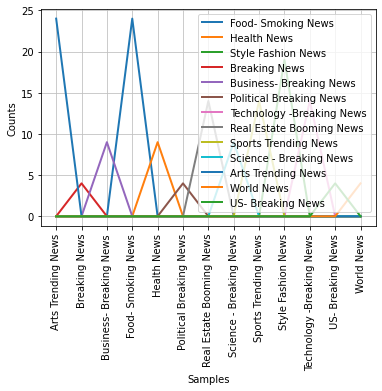

In [34]:
from nltk.probability import ConditionalFreqDist
cfdist = ConditionalFreqDist()
for category in set(newsFeeds.Category):
    for eahc in surnames.Category:
        if((category == eahc) and (category in ['Breaking News','World News','US- Breaking News','Political Breaking News','Business- Breaking News','Technology -Breaking News','Science - Breaking News','Health News','Sports Trending News','Arts Trending News','Style Fashion News','Real Estate Booming News','Food- Smoking News'])):
            cfdist[category][eahc]+=1
        
cfdist.plot()

In [38]:
file1 = open('./data/crime-and-punishment.txt')
CRIME_AND_PUNISHMENT = file1.read()
file1.close()

In [41]:
_dict={}
count = 0
## Assuming the text values are inside "data" folder

filename = input("Enter a filename:")
fileloc = "./data/"+filename
print(fileloc)
try:
    file = open(fileloc,'r')
    for line in file:
            if(line.startswith('From ')):
                _lst = (line.split()[1].split("@"))
                if(_dict.get(_lst[1]) == None):
                    _dict[_lst[1]]= count + 1
                else:
                    _dict[_lst[1]] = _dict.get(_lst[1])+1


    _sorted_val = sorted(_dict.items(), key=lambda x: x[1], reverse=True)
    for key,value in _sorted_val:
           print(key,value)
except:
    print("Either File Not Present/Some Problem in opening file. Please check it!")

Enter a filename:mbox-short.txt
./data/mbox-short.txt
iupui.edu 8
umich.edu 7
uct.ac.za 6
media.berkeley.edu 4
caret.cam.ac.uk 1
gmail.com 1
